# Galaxia: Generating synthetic surveys

## Parameters/outputs: 

For files named test1_*, they are contained in the file $\texttt{test1parameters}$, which is located in the /u/casey_lam/scratch directory on sloop. In particular, we try to get all stars (so magnitude limits are -1000 to 1000), we want a full sky survey (so geometryOption is set to 0), and fSample is 10${}^{-6}$ such that the computer doesn't become stupid slow. 

For files named testLOS_*, they are contained in the file $\texttt{testLOSparameters}$, which is also located in /u/casey_lam/scratch. Here, we are considering the line of sight to a particular OGLE event. Again we want all stars, so magnitude limits are -1000 to 1000, the patch of sky is OGLE's field of view (35' x 35' = 0.34 deg${}^2$) so the surveyArea is set to 0.34. (The first time I ran this, I left fSample = 1 since I figured it wouldn't be that many stars... it ended up making 155 million stars, so I reran it with an fSample = 10${}^{-4}$.)

The relevant outputs are 3D position, proper motions, and brightness at several particular filters (probably R and K band.)

# Proper Motion and Velocity Dispersion

### Checks
First, a test to make sure the code works: given a flat velocity distribution, we should see the proper motion decrease in a 1/d fashion (since $v \propto \mu d$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import astropy.units as u
import astropy.coordinates as coord

/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


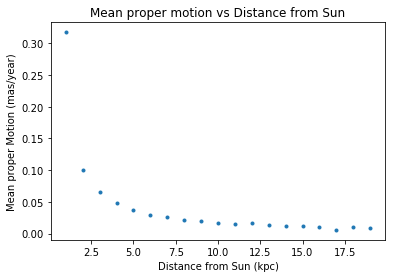

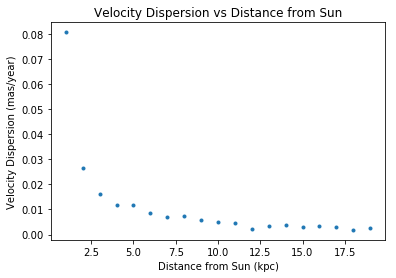

0.0188836288013
-0.000228259311294
-0.0372086408181
0.0444682912616
-0.164418117031
0.0235200033277


In [2]:
#samples points over an n-sphere of radius 1
def sample_spherical(npoints, ndim):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

#samples points from a gaussian
def sample_gauss(npoints, ndim):
    vec = 5 * np.random.randn(ndim, npoints)
    return vec

#make position and velocity vectors
#velocities are all 1 km/s
#each x,y,z coordinate randomly sampled from a Gaussian
HCvelvec = np.array(sample_spherical(1000,3))
HCposvec = np.array(sample_gauss(1000,3))

#break vectors up into individual components
HCxvel = HCvelvec[0]
HCyvel = HCvelvec[1]
HCzvel = HCvelvec[2]
HCx = HCposvec[0]
HCy = HCposvec[1]
HCz = HCposvec[2]

#check to see if they are all the same velocity; uncomment print statement to see.
HCvelradius = []
for i in np.arange(len(HCxvel)):
    HCvelradius.append(np.sqrt(HCxvel[i]**2 + HCyvel[i]**2 + HCzvel[i]**2))
HCvelradius = np.array(HCvelradius)
#print(HCvelradius)

#calculate the length of the position vector
HCradius = []
for i in np.arange(len(HCx)):
    HCradius.append(np.sqrt(HCx[i]**2 + HCy[i]**2 + HCz[i]**2))
HCradius = np.array(HCradius)

#check to see the maximum and minimum length of position vector; uncomment print statement to see
#print(min(HCradius))
#print(max(HCradius))

vDOTr = (HCxvel*HCx + HCyvel*HCy + HCzvel*HCz)/(HCradius)
rHAT = HCposvec/HCradius
allpropermotion = np.linalg.norm(HCvelvec - vDOTr*rHAT, axis = 0)/(4.74 * HCradius)

averagemotion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
veldispersion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in np.arange(20):
    propermotions = allpropermotion[(HCradius > i) & (HCradius <= i + 1)]
    averagemotion[i] = np.mean(propermotions)
    veldispersion[i] = np.std(propermotions)
radialdist = np.arange(1,21)

plt.plot(radialdist, averagemotion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Mean proper Motion (mas/year)")
plt.title("Mean proper motion vs Distance from Sun")
plt.show()

plt.plot(radialdist, veldispersion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Velocity Dispersion (mas/year)")
plt.title("Velocity Dispersion vs Distance from Sun")
plt.show()

print(np.average(HCxvel))
print(np.average(HCyvel))
print(np.average(HCzvel))
print(np.average(HCx))
print(np.average(HCy))
print(np.average(HCz))

Next, we consider a line of sight at l = 0 deg and b = 0 deg: straight through the Galactic Center. 

/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/casey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


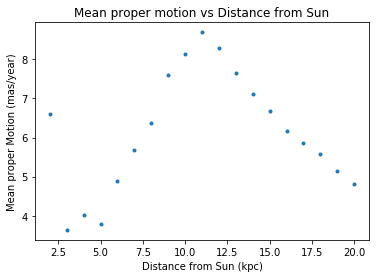

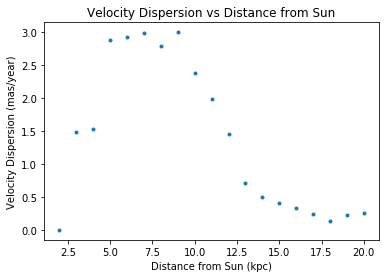

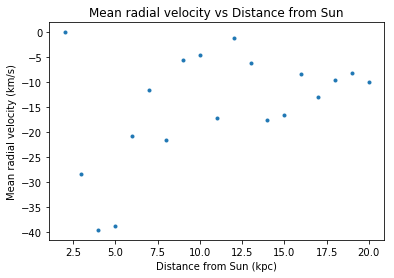

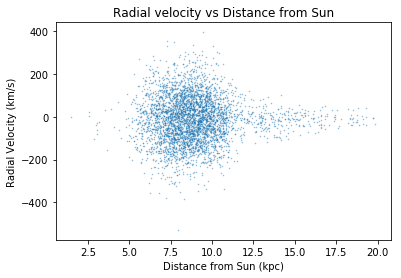

9.07111965755
-7.8562512463e-05
-4.16229474738e-05
-11.3701940883
-289.14459976
-9.58801681902
[ -8.00000000e+00   0.00000000e+00   1.50000000e-02   1.11000000e+01
   2.39080000e+02   7.25000000e+00]


In [3]:
#load px, py, pz (cartesian heliocentric positions) 
HCx = np.loadtxt("testthruGC_px") #kpc
HCy = np.loadtxt("testthruGC_py") #kpc
HCz = np.loadtxt("testthruGC_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) 
HCxvel = np.loadtxt("testthruGC_vx") #km/s
HCyvel = np.loadtxt("testthruGC_vy") #km/s
HCzvel = np.loadtxt("testthruGC_vz") #km/s

HCvel = []
for i in np.arange(len(HCxvel)):
    HCvel.append(np.sqrt(HCxvel[i]**2 + HCyvel[i]**2 + HCzvel[i]**2))
HCvel = np.array(HCvel)

HCradius = []
for i in np.arange(len(HCx)):
    HCradius.append(np.sqrt(HCx[i]**2 + HCy[i]**2 + HCz[i]**2))
HCradius = np.array(HCradius)

#calculate average proper motion and velocity dispersion as a function of distance from the Sun
HCvelvec = np.array([HCxvel, HCyvel, HCzvel])
HCposvec = np.array([HCx, HCy, HCz])
vDOTr = (HCxvel*HCx + HCyvel*HCy + HCzvel*HCz)/(HCradius)
rHAT = HCposvec/HCradius
allpropermotion = np.linalg.norm(HCvelvec - vDOTr*rHAT, axis = 0)/(4.74 * HCradius)

averagemotion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
veldispersion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in np.arange(20):
    propermotions = allpropermotion[(HCradius > i) & (HCradius <= i + 1)]
    averagemotion[i] = np.mean(propermotions)
    veldispersion[i] = np.std(propermotions)
radialdist = np.arange(1,21)

plt.plot(radialdist, averagemotion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Mean proper Motion (mas/year)")
plt.title("Mean proper motion vs Distance from Sun")
plt.show()

plt.plot(radialdist, veldispersion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Velocity Dispersion (mas/year)")
plt.title("Velocity Dispersion vs Distance from Sun")
plt.show()

#calculate radial velocity as a function of distance from the Sun
dataarray = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in np.arange(20):
    radialvel = vDOTr[(HCradius > i) & (HCradius <= i + 1)]
    dataarray[i] = np.mean(radialvel)
radialdist = np.arange(1,21)
plt.plot(radialdist, dataarray, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Mean radial velocity (km/s)")
plt.title("Mean radial velocity vs Distance from Sun")
plt.show()

radiusvec = []
radvelvec = []
for i in np.arange(len(HCradius)):
    if HCradius[i] < 20:
        radiusvec.append(HCradius[i])
        radvelvec.append(vDOTr[i])
radiusvec = np.array(radiusvec)
radvelvec = np.array(radvelvec)
plt.plot(radiusvec, radvelvec, '.', alpha=0.5, ms=1)
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Radial Velocity (km/s)")
plt.title("Radial velocity vs Distance from Sun")
plt.show()

print(np.average(HCx))
print(np.average(HCy))
print(np.average(HCz))

print(np.average(HCxvel))
print(np.average(HCyvel))
print(np.average(HCzvel))

center = np.loadtxt("testthruGC_center") 
print(center)

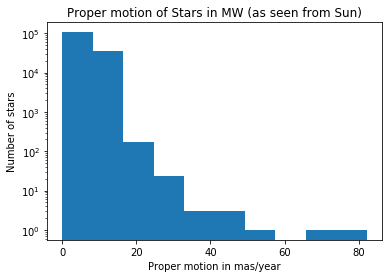

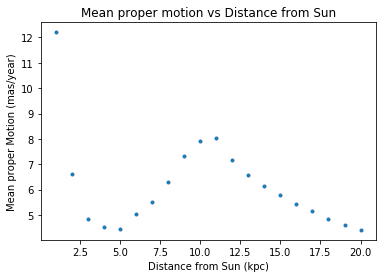

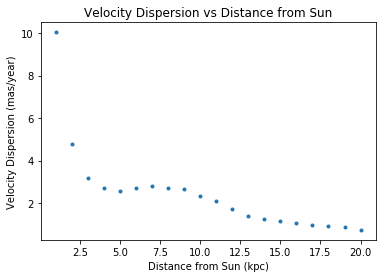

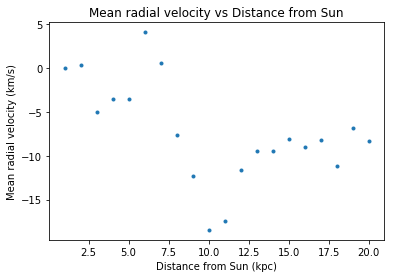

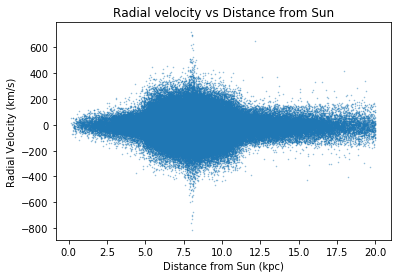

In [4]:
#load px, py, pz (cartesian heliocentric positions) 
HCx = np.loadtxt("test1_px") #kpc
HCy = np.loadtxt("test1_py") #kpc
HCz = np.loadtxt("test1_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) 
HCxvel = np.loadtxt("test1_vx") #km/s
HCyvel = np.loadtxt("test1_vy") #km/s
HCzvel = np.loadtxt("test1_vz") #km/s

#calculate the magnitude of the velocity and position vector in HC coordinates
HCvel = []
for i in np.arange(len(HCxvel)):
    HCvel.append(np.sqrt(HCxvel[i]**2 + HCyvel[i]**2 + HCzvel[i]**2))
HCvel = np.array(HCvel)

HCradius = []
for i in np.arange(len(HCx)):
    HCradius.append(np.sqrt(HCx[i]**2 + HCy[i]**2 + HCz[i]**2))
HCradius = np.array(HCradius)

HCvelvec = np.array([HCxvel, HCyvel, HCzvel])
HCposvec = np.array([HCx, HCy, HCz])
vDOTr = (HCxvel*HCx + HCyvel*HCy + HCzvel*HCz)/(HCradius)
rHAT = HCposvec/HCradius
propermotion = np.linalg.norm(HCvelvec - vDOTr*rHAT, axis = 0)/(4.74 * HCradius)

plt.hist(propermotion)
plt.ylabel("Number of stars")
plt.xlabel("Proper motion in mas/year")
plt.yscale('log')
plt.title("Proper motion of Stars in MW (as seen from Sun)")
plt.show()

#calculate average proper motion and velocity dispersion as a function of distance from the Sun
HCvelvec = np.array([HCxvel, HCyvel, HCzvel])
HCposvec = np.array([HCx, HCy, HCz])
vDOTr = (HCxvel*HCx + HCyvel*HCy + HCzvel*HCz)/(HCradius)
rHAT = HCposvec/HCradius
allpropermotion = np.linalg.norm(HCvelvec - vDOTr*rHAT, axis = 0)/(4.74 * HCradius)

averagemotion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
veldispersion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in np.arange(20):
    propermotions = allpropermotion[(HCradius > i) & (HCradius <= i + 1)]
    averagemotion[i] = np.mean(propermotions)
    veldispersion[i] = np.std(propermotions)
radialdist = np.arange(1,21)

plt.plot(radialdist, averagemotion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Mean proper Motion (mas/year)")
plt.title("Mean proper motion vs Distance from Sun")
plt.show()

plt.plot(radialdist, veldispersion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Velocity Dispersion (mas/year)")
plt.title("Velocity Dispersion vs Distance from Sun")
plt.show()

HCvelvec = np.array([HCxvel, HCyvel, HCzvel])
HCposvec = np.array([HCx, HCy, HCz])
vDOTr = (HCxvel*HCx + HCyvel*HCy + HCzvel*HCz)/(HCradius)

#calculate radial velocity as a function of distance from the Sun
dataarray = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in np.arange(20):
    radialvel = vDOTr[(HCradius > i) & (HCradius <= i + 1)]
    dataarray[i] = np.mean(radialvel)
radialdist = np.arange(1,21)
plt.plot(radialdist, dataarray, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Mean radial velocity (km/s)")
plt.title("Mean radial velocity vs Distance from Sun")
plt.show()

radiusvec = []
radvelvec = []
for i in np.arange(len(HCradius)):
    if HCradius[i] < 20:
        radiusvec.append(HCradius[i])
        radvelvec.append(vDOTr[i])
radiusvec = np.array(radiusvec)
radvelvec = np.array(radvelvec)
plt.plot(radiusvec, radvelvec, '.', alpha=0.5, ms=1)
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Radial Velocity (km/s)")
plt.title("Radial velocity vs Distance from Sun")
plt.show()

Just a note to myself: although km/s and mas/year are both measures of motion, they aren't equivalent! Consider the plots below, which describe the distribution of velocities of stars in km/s. They aren't the same shape as the plots when the units are in mas/year! That's because when you describe angular motion, you are considering the motion in projection, and it is dependent on how far away from the object you're observing! The proper motion we observe of a car moving at 20 km/s is a lot larger than the proper motion we'd observe of some star moving at 20 km/s!

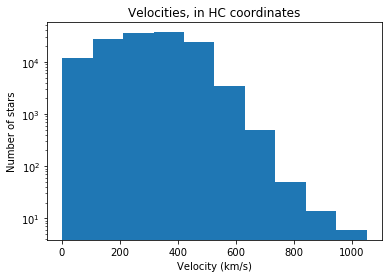

The velocity dispersion is 130.97341234977984 km/s.


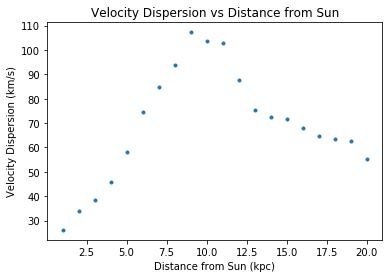

In [5]:
#calculate the magnitude of the velocity vector in HC coordinates
velocityHC = []
for i in np.arange(len(HCxvel)):
    velocityHC.append(np.sqrt(HCxvel[i]**2 + HCyvel[i]**2 + HCzvel[i]**2))
    
plt.hist(velocityHC)
plt.xlabel("Velocity (km/s)")
plt.ylabel("Number of stars")
plt.yscale('log')
plt.title("Velocities, in HC coordinates")
plt.show()
sigmaHC = np.std(velocityHC)
print("The velocity dispersion is " + repr(sigmaHC) + " km/s.")

radiusHC = []
for i in np.arange(len(HCx)):
    radiusHC.append(np.sqrt(HCx[i]**2 + HCy[i]**2 + HCz[i]**2))

radiusHC = np.array(radiusHC)
velocityHC = np.array(velocityHC)

#calculate velocity dispersion as a function of distance from the Sun
dataarray = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in np.arange(20):
    velocities = velocityHC[(radiusHC > i) & (radiusHC <= i + 1)]
    dataarray[i] = np.std(velocities)
radialdist = np.arange(1,21)
plt.plot(radialdist, dataarray, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Velocity Dispersion (km/s)")
plt.title("Velocity Dispersion vs Distance from Sun")
plt.show()

In [6]:
##SCRATCH

print(np.average(HCx))
print(np.average(HCy))
print(np.average(HCz))

print(np.average(HCxvel))
print(np.average(HCyvel))
print(np.average(HCzvel))

center = np.loadtxt("testthruGC_center") 
print(center)

8.04359059873
-0.0514211252321
-0.000354825353191
-11.7003913529
-239.236811947
-7.03972814661
[ -8.00000000e+00   0.00000000e+00   1.50000000e-02   1.11000000e+01
   2.39080000e+02   7.25000000e+00]


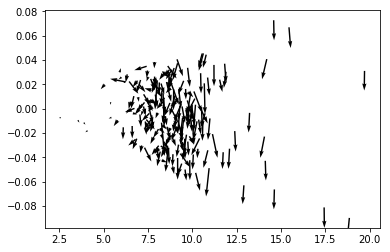

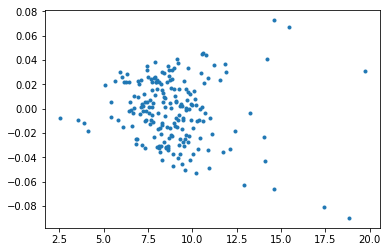

In [44]:
#load px, py, pz (cartesian heliocentric positions) 
HCx = np.loadtxt("testthruGC_px") #kpc
HCy = np.loadtxt("testthruGC_py") #kpc
HCz = np.loadtxt("testthruGC_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) 
HCxvel = np.loadtxt("testthruGC_vx") #km/s
HCyvel = np.loadtxt("testthruGC_vy") #km/s
HCzvel = np.loadtxt("testthruGC_vz") #km/s

start = 1246
i = 500
HCx = HCx[start::i]
HCy = HCy[start::i]
HCxvel = HCxvel[start::i]
HCyvel = HCyvel[start::i]

plt.quiver(HCx, HCy, HCxvel, HCyvel)
plt.axis('equal')
plt.xlim(0, 16)
plt.ylim(-8, 8)
plt.show()

plt.plot(HCx,HCy,'.')
plt.axis('equal')
plt.xlim(0, 16)
plt.ylim(-8, 8)
plt.show()

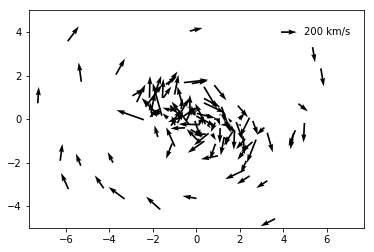

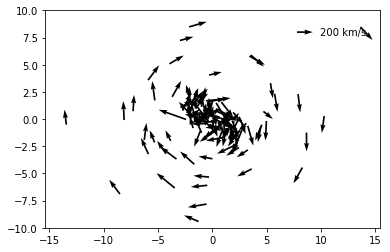

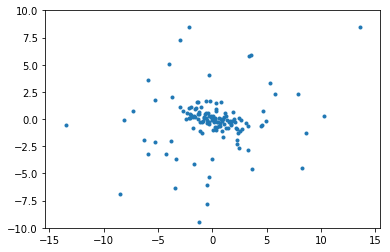

142


In [71]:
#load px, py, pz (cartesian heliocentric coordinates) from galaxia
HCx = np.loadtxt("test1_px") #kpc
HCy = np.loadtxt("test1_py") #kpc
HCz = np.loadtxt("test1_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) from galaxia
HCxvel = np.loadtxt("test1_vx") #km/s
HCyvel = np.loadtxt("test1_vy") #km/s
HCzvel = np.loadtxt("test1_vz") #km/s

sun = np.loadtxt("test1_center") 
#first three values are positions in kpc
#last three values are velocities in km/s

#convert to galactocentric coordinates
GCx = HCx + sun[0]
GCy = HCy + sun[1]
GCz = HCz + sun[2]
GCxvel = HCxvel + sun[3]
GCyvel = HCyvel + sun[4]
GCzvel = HCzvel + sun[5]

i = 1000
GCx = GCx[0::i]
GCy = GCy[0::i]
GCxvel = GCxvel[0::i]
GCyvel = GCyvel[0::i]

Q = plt.quiver(GCx, GCy, GCxvel, GCyvel)
qk = plt.quiverkey(Q, 0.8, 0.9, 200, r'200 km/s', labelpos='E')
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

Q = plt.quiver(GCx, GCy, GCxvel, GCyvel)
qk = plt.quiverkey(Q, 0.8, 0.9, 200, r'200 km/s', labelpos='E')
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

plt.plot(GCx,GCy,'.')
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

print(len(GCx))